<a href="https://colab.research.google.com/github/AsifIqbal123-cyber/machinelearning/blob/main/TinyImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import torch
from torch import nn
from torchvision.datasets import CIFAR100
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim



train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(15),
                                      transforms.ColorJitter(brightness=0.2),
                                      transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                      ])


test_transform = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                  [0.229, 0.224, 0.225])
                                     ])





Train_set = CIFAR100(root='./data', train=True, download=True, transform=train_transform,target_transform=None)
Test_set = CIFAR100(root='./data', train=False, download=True, transform=test_transform)


In [56]:
# See first training sample
image, label = Train_set[0]
print(image.shape, label)

torch.Size([3, 224, 224]) 19


In [57]:
Train_set[0][0].shape

torch.Size([3, 224, 224])

In [58]:
len(Train_set.data), len(Train_set.targets), len(Test_set.data), len(Test_set.targets)

(50000, 50000, 10000, 10000)

In [73]:
class_names = Train_set.classes
print(class_names)
print(len(class_names))

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

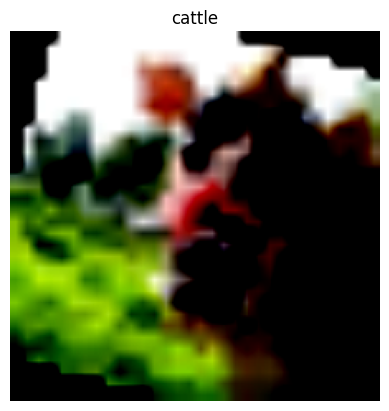

In [60]:
import matplotlib.pyplot as plt
import numpy as np


#This current image is invalid for plt because the format is wrong. Currently ->[C,H,W], It needs to be -> [H,W,C]
image, label = Train_set[0]
image = image.permute(1,2,0)

plt.imshow(image)
plt.title(class_names[label])
plt.axis("off")
plt.show()

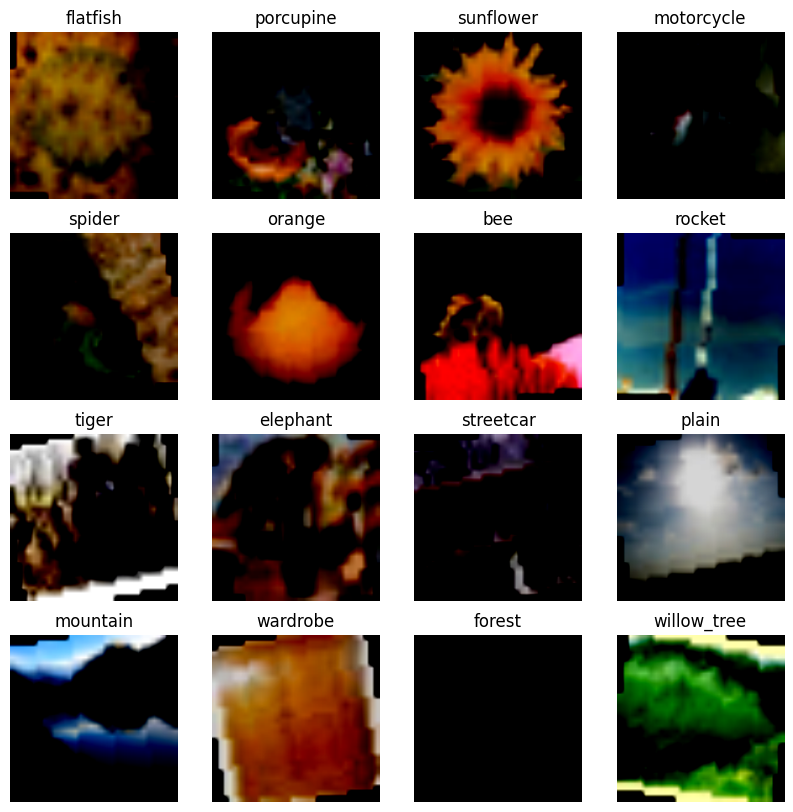

In [61]:
# Plot a grid of images
torch.manual_seed(42)
fig = plt.figure(figsize=(10,10))
rows, cols =4,4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(Train_set), size=[1]).item()
  img, label = Train_set[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.permute(1,2,0))
  plt.title(class_names[label])
  plt.axis("off")
plt.show()

In [62]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=Train_set,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=Test_set,
                              batch_size=BATCH_SIZE,
                              shuffle=False)




# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x79c9f9bd9650>, <torch.utils.data.dataloader.DataLoader object at 0x79c9f9dcc950>)
Length of train dataloader: 1563 batches of 32
Length of test dataloader: 313 batches of 32


In [64]:
# Checking the inside of the dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 3, 224, 224]), torch.Size([32]))

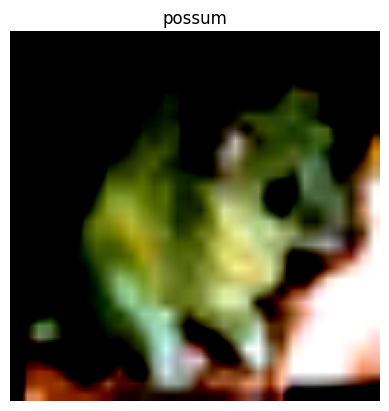

Image size: torch.Size([3, 224, 224])
Label: 64, label size: torch.Size([])


In [65]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis("off")
plt.show()
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [66]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [colour_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [colour_channels*height*width]")

Shape before flattening: torch.Size([3, 224, 224]) -> [colour_channels, height, width]
Shape after flattening: torch.Size([3, 50176]) -> [colour_channels*height*width]


In [71]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=32,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)
output_image = conv_layer(x)
print(f"Output of x: {output_image}")

Output of x: tensor([[[ 0.4629,  0.5750,  0.5750,  ...,  0.5750,  0.5750,  0.4295],
         [ 0.3414,  0.4356,  0.4356,  ...,  0.4356,  0.4356,  0.1481],
         [ 0.3414,  0.4356,  0.4356,  ...,  0.4356,  0.4356,  0.1481],
         ...,
         [ 0.3414,  0.4356,  0.4356,  ...,  0.4356,  0.4356,  0.1481],
         [ 0.3414,  0.4356,  0.4356,  ...,  0.4356,  0.4356,  0.1481],
         [ 0.1714,  0.1986,  0.1986,  ...,  0.1986,  0.1986,  0.1347]],

        [[-0.5745, -0.4695, -0.4695,  ..., -0.4695, -0.4695, -0.0237],
         [-0.4092, -0.6036, -0.6036,  ..., -0.6036, -0.6036, -0.2348],
         [-0.4092, -0.6036, -0.6036,  ..., -0.6036, -0.6036, -0.2348],
         ...,
         [-0.4092, -0.6036, -0.6036,  ..., -0.6036, -0.6036, -0.2348],
         [-0.4092, -0.6036, -0.6036,  ..., -0.6036, -0.6036, -0.2348],
         [-0.1174, -0.3652, -0.3652,  ..., -0.3652, -0.3652, -0.1815]],

        [[-0.1663, -0.0264, -0.0264,  ..., -0.0264, -0.0264,  0.4220],
         [-0.5810, -0.4105, -0.4

In [74]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Conv2d(in_channels=3,out_channels=16, kernel_size=(3,3), stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2,2))
    )

    dummy = torch.randn(1,3,224,224)
    out = self.layer_stack(dummy)
    self.flattened_size = out.view(1,-1).shape[1]

    self.classifer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(self.flattened_size,128),
        nn.ReLU(),
        nn.Linear(128,10)
    )

  def forward(self, x):
    x= self.layer_stack(x)
    x= self.classifer(x)
    return x
